# Import dependencies

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Dataset Loading and Initial Analysis

In [22]:
path = "."
filename_read = os.path.join(path, "AirQuality.csv")
dataset = pd.read_csv(filename_read, sep = ";", decimal = ",")
dataset.replace(to_replace = -200, value = np.nan, inplace = True) # -200 equal to NaN in dataset

print("Quick overview of what the data is like")
print(dataset.head())
print("Quick overview of the dataset size and types")
print(dataset.info())
print("Dataset shape")
print(dataset.shape)
print("Checking for null elements:")
print(dataset.isnull().sum(axis = 0))
print("Quick overview of dataset statistics")
print(dataset.describe())

Quick overview of what the data is like
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578     

# NaN values cleaning

In [23]:
dataset.drop(['NMHC(GT)','Unnamed: 15', 'Unnamed: 16'], axis = 1,inplace=True, errors = 'ignore')
# Test performance change by dropping NA values or filling them with average of their column
dataset.dropna(inplace=True)

# fill_mean = lambda col : col.fillna(col.mean())
# dataset.apply(fill_mean, axis = 0)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB
None


# Date split into Day, Month, Year, Weekday

In [24]:
dataset['DateTime'] = pd.to_datetime(dataset['Date'].astype(str) + '-' + dataset['Time'].astype(str), format='%d/%m/%Y-%H.%M.%S')
dataset["Day"] = dataset["DateTime"].dt.day
dataset["Month"] = dataset["DateTime"].dt.month_name().astype('category').cat.codes
dataset["Year"] = dataset["DateTime"].dt.year
dataset["Weekday"] = dataset["DateTime"].dt.day_name().astype('category').cat.codes
dataset['Time'] = dataset["DateTime"].dt.hour
# Drop Date as now irrelevant
dataset.drop('Date', axis = 1,inplace=True, errors = 'ignore')

print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           6941 non-null   int32         
 1   CO(GT)         6941 non-null   float64       
 2   PT08.S1(CO)    6941 non-null   float64       
 3   C6H6(GT)       6941 non-null   float64       
 4   PT08.S2(NMHC)  6941 non-null   float64       
 5   NOx(GT)        6941 non-null   float64       
 6   PT08.S3(NOx)   6941 non-null   float64       
 7   NO2(GT)        6941 non-null   float64       
 8   PT08.S4(NO2)   6941 non-null   float64       
 9   PT08.S5(O3)    6941 non-null   float64       
 10  T              6941 non-null   float64       
 11  RH             6941 non-null   float64       
 12  AH             6941 non-null   float64       
 13  DateTime       6941 non-null   datetime64[ns]
 14  Day            6941 non-null   int32         
 15  Month          6941 non-nu

# Correlation Table

In [25]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Day,Month,Year,Weekday
Time,1.000000,0.334863,0.287104,0.312121,0.349429,0.212155,-0.275140,0.351247,0.197884,0.213664,0.187500,-0.266642,-0.012305,-0.014140,0.012507,0.010539,-0.010742,0.004125
CO(GT),0.334863,1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.018334,0.064753,0.059346,0.020334,0.008363,0.110445,-0.062863,0.049215
PT08.S1(CO),0.287104,0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.028277,0.169234,0.149752,-0.014803,0.017307,0.098372,0.008029,0.042228
C6H6(GT),0.312121,0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,0.189003,-0.021592,0.187072,-0.081959,0.006162,0.179121,-0.156601,0.058746
PT08.S2(NMHC),0.349429,0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,0.228333,-0.046084,0.205590,-0.103637,0.000271,0.178384,-0.171024,0.053720
NOx(GT),0.212155,0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,-0.275998,0.232255,-0.144186,0.425542,-0.007137,0.139436,0.217982,0.037727
PT08.S3(NOx),-0.275140,-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.099495,-0.116479,-0.223381,-0.269086,0.005305,-0.101997,-0.173039,-0.028237
NO2(GT),0.351247,0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.214325,-0.075333,-0.349646,0.365618,-0.000331,-0.005744,0.384341,0.038163
PT08.S4(NO2),0.197884,0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,0.566586,-0.009160,0.646390,-0.545047,0.002206,0.178562,-0.518358,0.048381
PT08.S5(O3),0.213664,0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,-0.046146,0.164821,0.075807,0.103162,-0.012790,0.121807,0.032893,0.064462


In [6]:
# Drop most correlated features
# How to choose which features to keep?
# Loss of performance?
dataset.drop(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)'], axis = 1,inplace=True, errors = 'ignore')

# Pairwise Relationships

In [ ]:
import seaborn as sns

dataset_percent = dataset.sample(frac=0.2)
g = sns.PairGrid(dataset_percent.iloc[:,:9],corner = True, hue="PT08.S3(NOx)")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Split Labels and Values

In [26]:
y = dataset['PT08.S3(NOx)']
# Time series dataframe cannot be loaded into sklearn -> Useful for analysis
dataset.drop('DateTime', axis = 1,inplace=True, errors = 'ignore')
dataset_final = dataset.drop('PT08.S3(NOx)',axis=1)
print(dataset_final.info())
#dataset.drop('DateTime', axis = 1,inplace=True, errors = 'ignore')
X = dataset_final.values

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           6941 non-null   int32  
 1   CO(GT)         6941 non-null   float64
 2   PT08.S1(CO)    6941 non-null   float64
 3   C6H6(GT)       6941 non-null   float64
 4   PT08.S2(NMHC)  6941 non-null   float64
 5   NOx(GT)        6941 non-null   float64
 6   NO2(GT)        6941 non-null   float64
 7   PT08.S4(NO2)   6941 non-null   float64
 8   PT08.S5(O3)    6941 non-null   float64
 9   T              6941 non-null   float64
 10  RH             6941 non-null   float64
 11  AH             6941 non-null   float64
 12  Day            6941 non-null   int32  
 13  Month          6941 non-null   int8   
 14  Year           6941 non-null   int32  
 15  Weekday        6941 non-null   int8   
dtypes: float64(11), int32(3), int8(2)
memory usage: 745.6 KB
None


# PCA

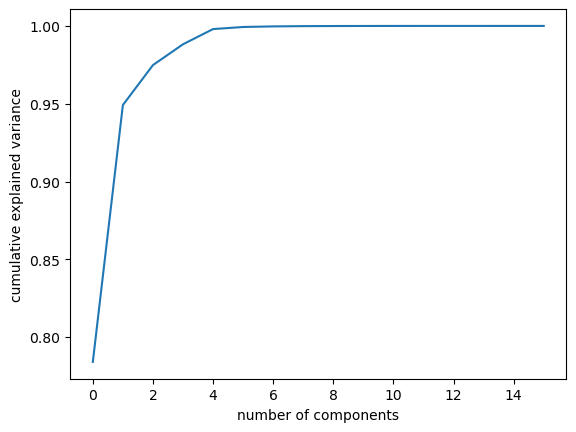

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(3)  
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

# Value Distribution

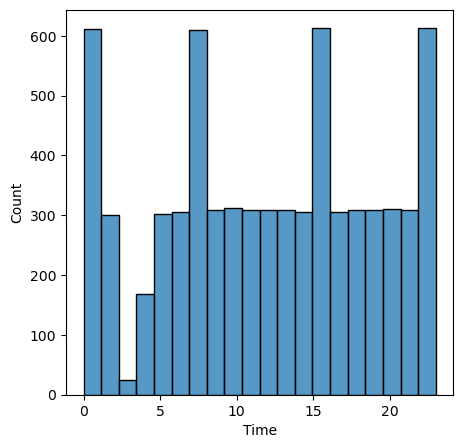

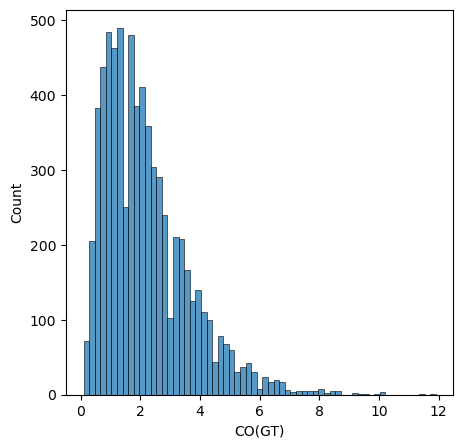

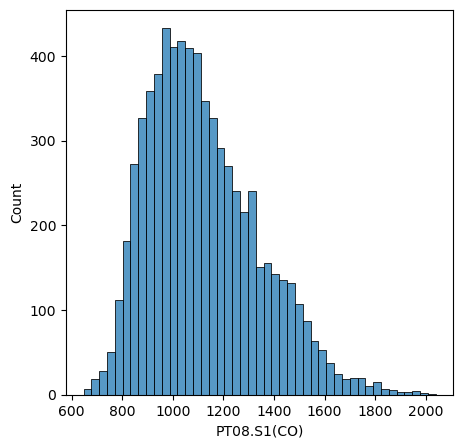

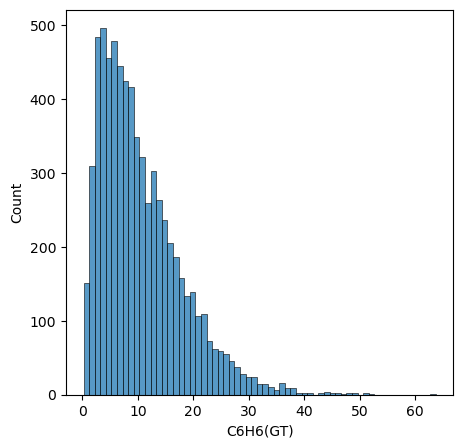

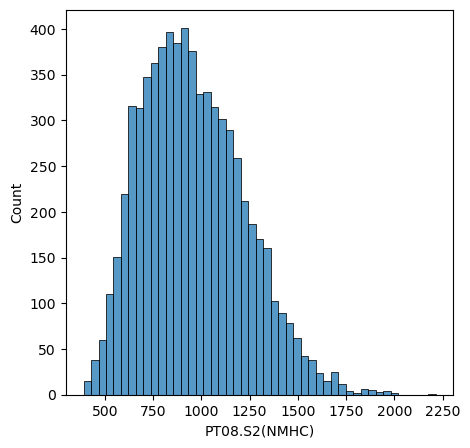

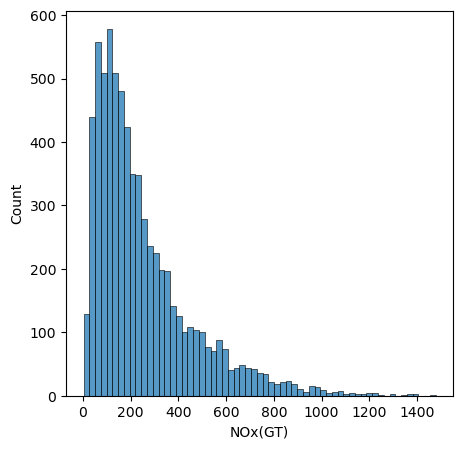

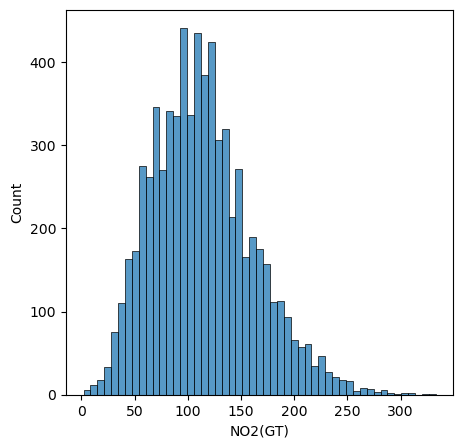

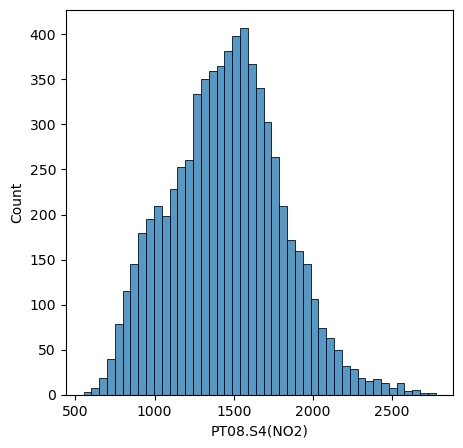

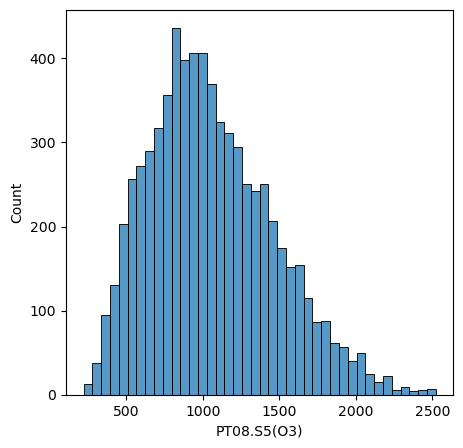

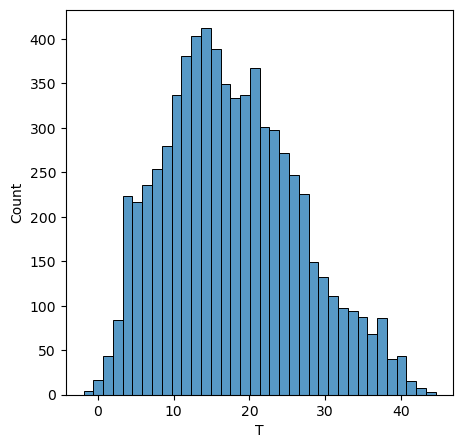

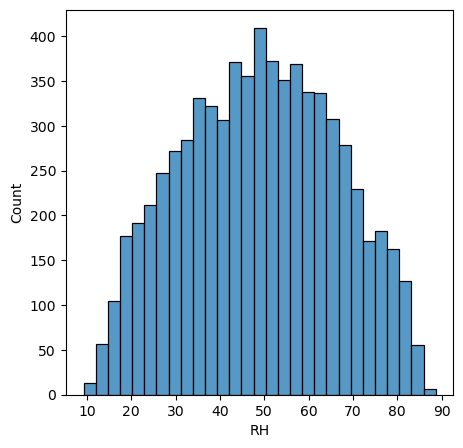

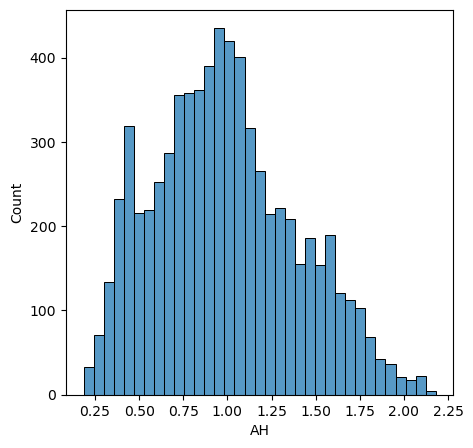

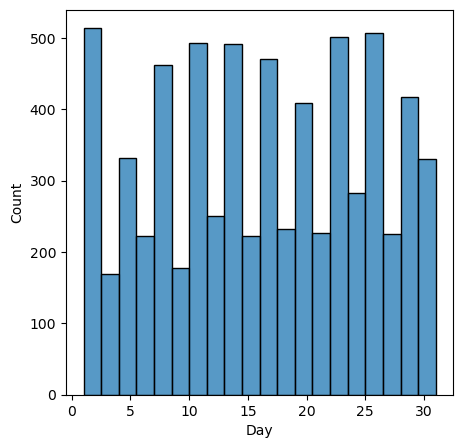

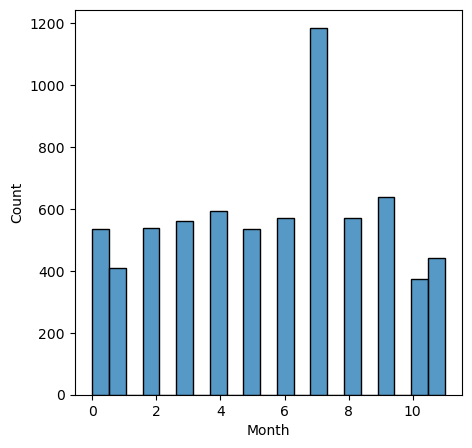

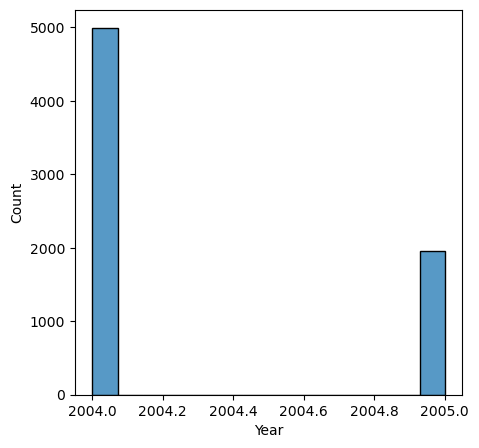

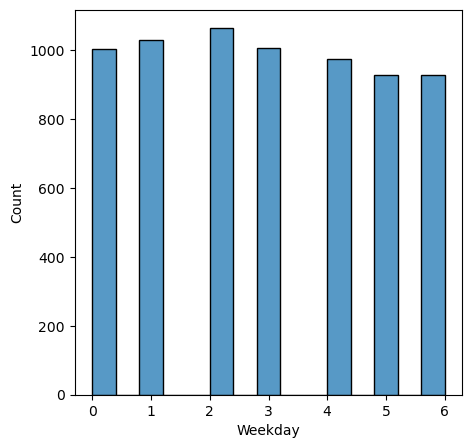

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in dataset_final:
    plt.figure(figsize=(5,5))
    sns.histplot(data=dataset_final, x=column)

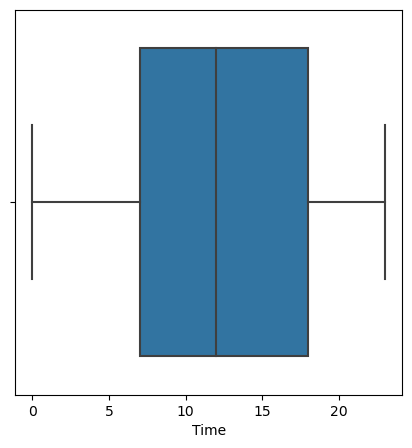

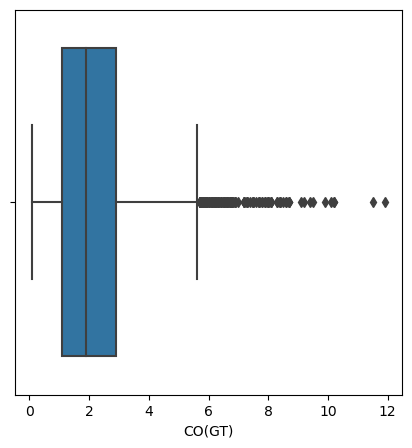

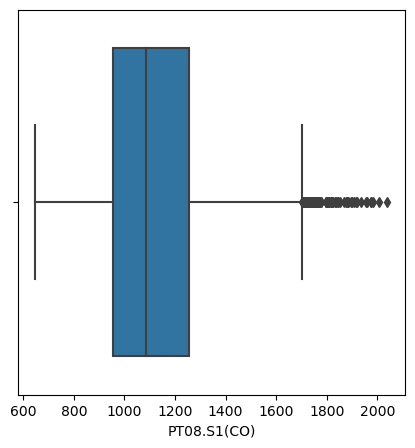

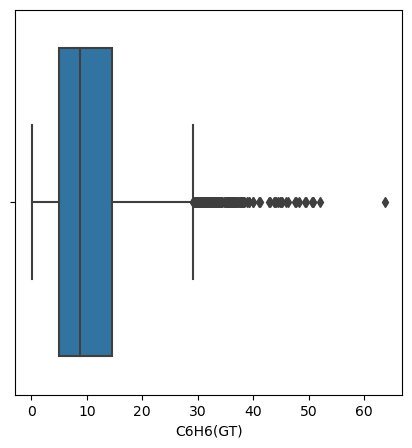

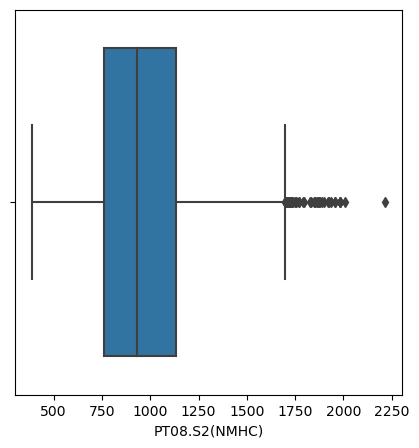

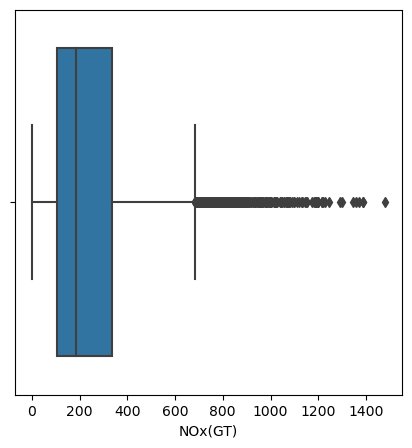

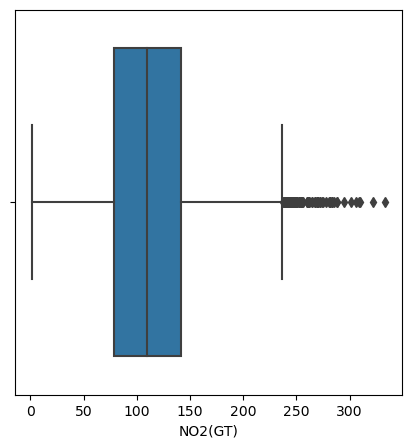

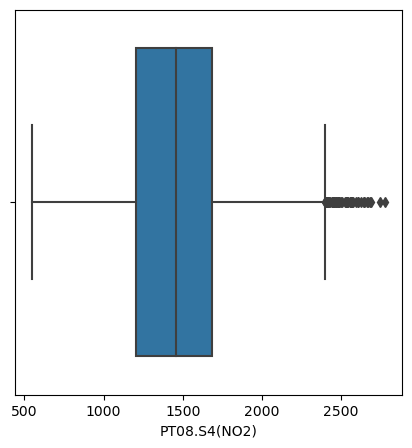

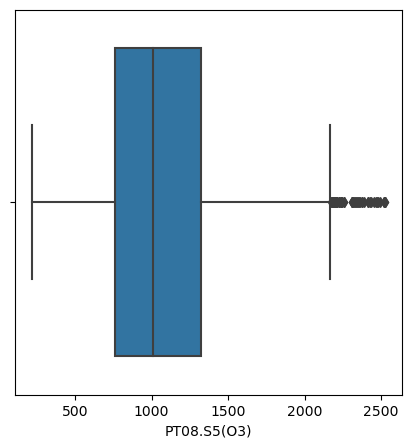

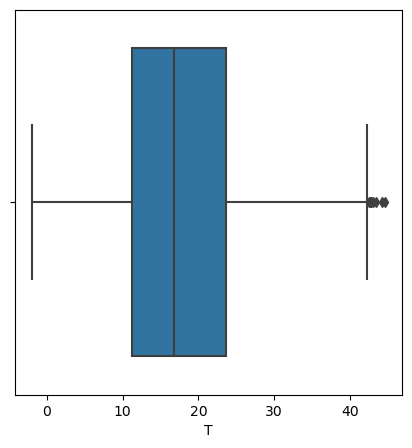

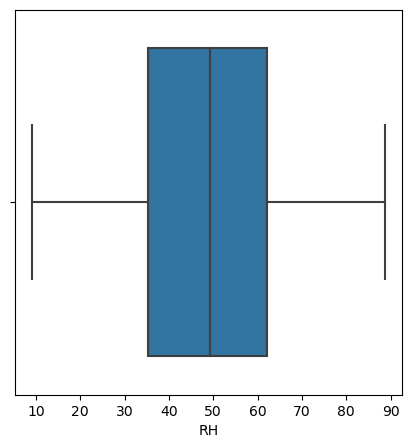

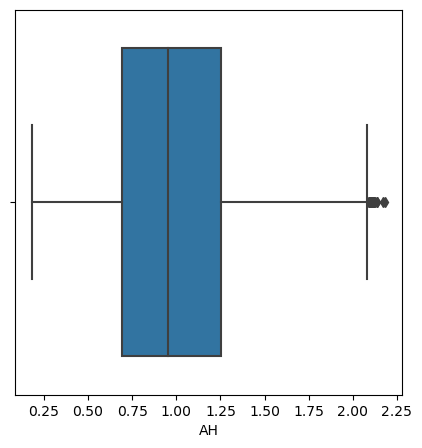

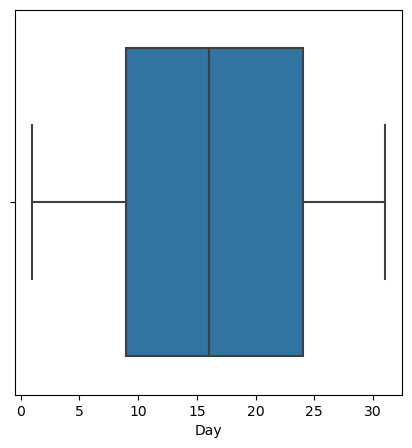

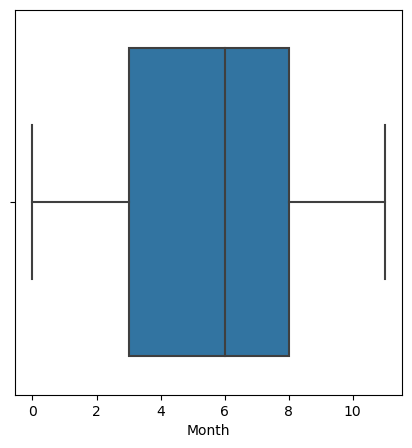

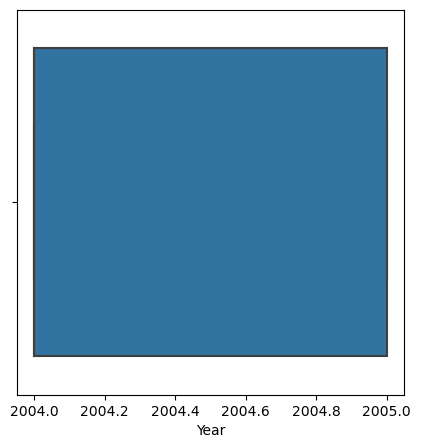

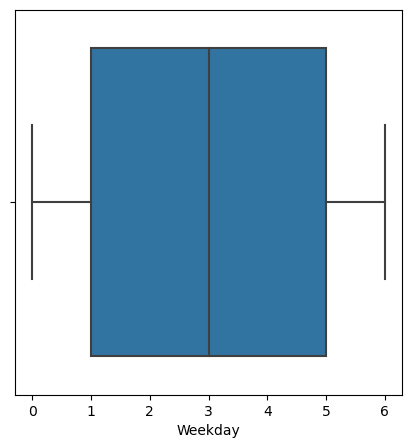

In [29]:
#  Doubts interpreting boxplot
import matplotlib.pyplot as plt

for column in dataset_final:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=dataset_final, x=column)

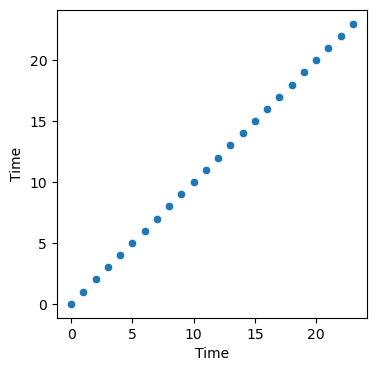

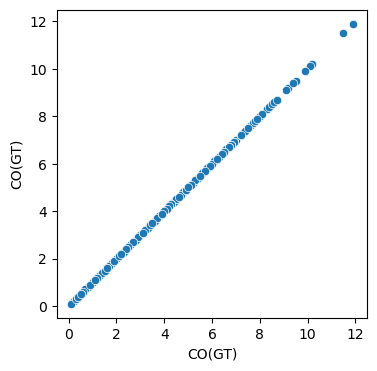

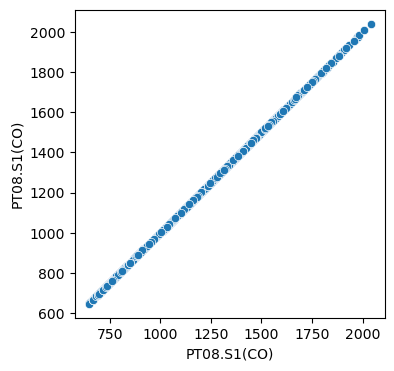

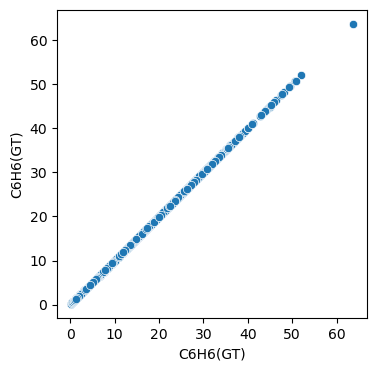

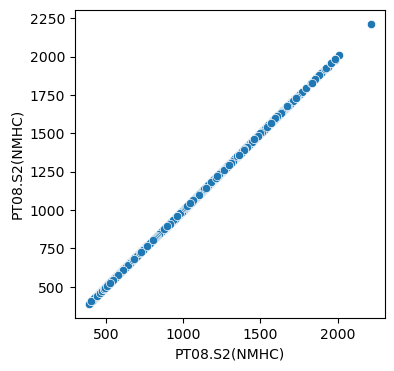

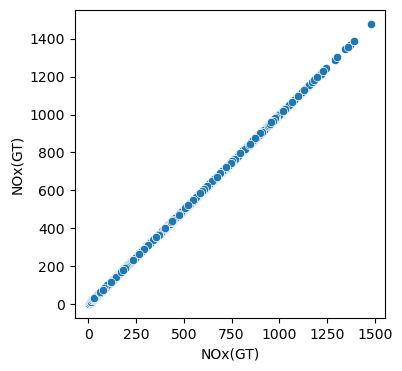

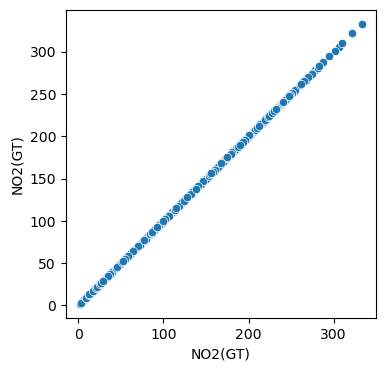

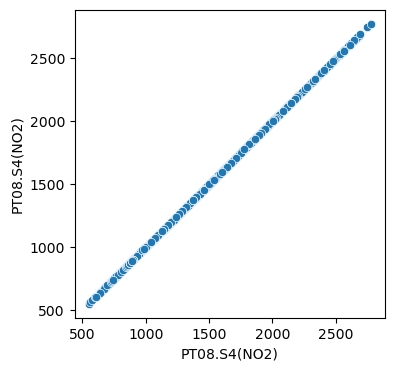

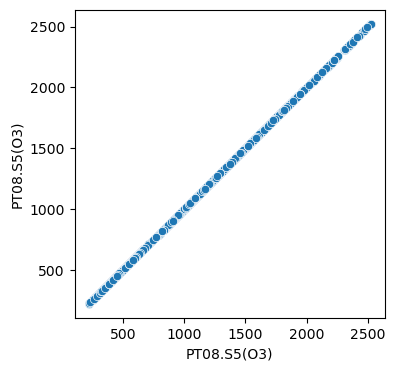

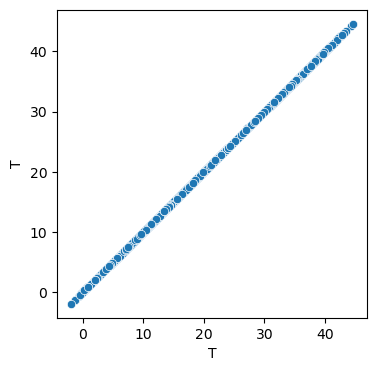

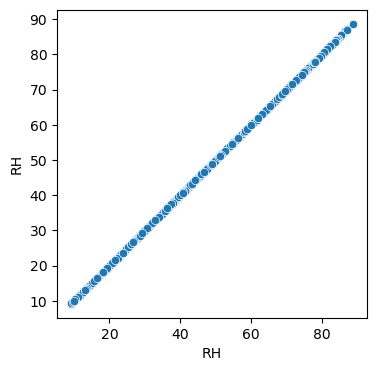

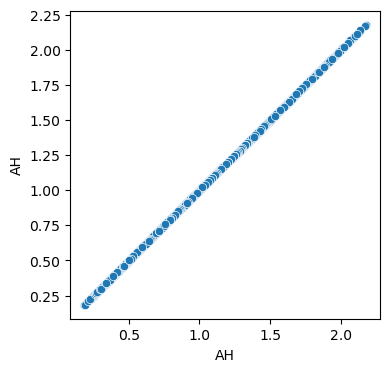

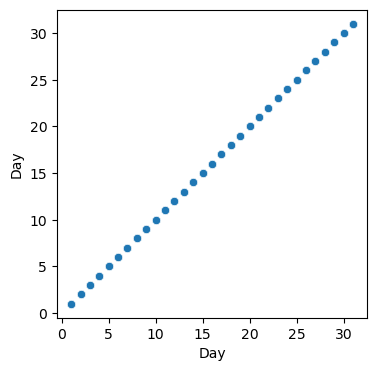

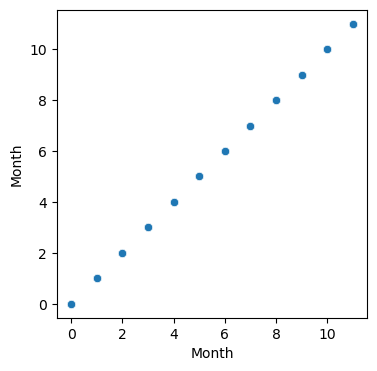

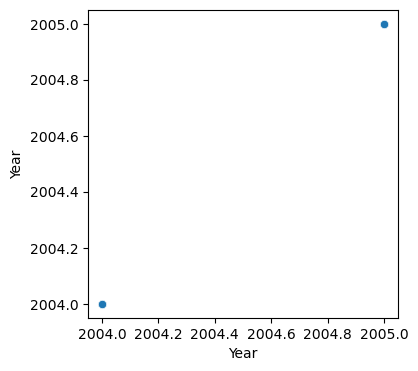

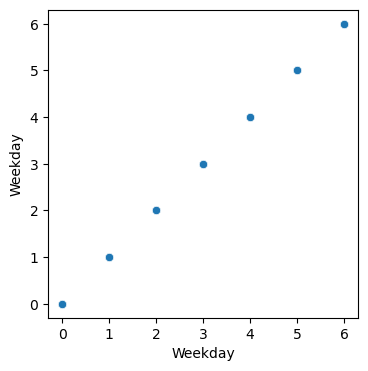

In [30]:
for column in dataset_final:
    plt.figure(figsize=(4,4))
    sns.scatterplot(data=dataset_final, x=column, y = column)


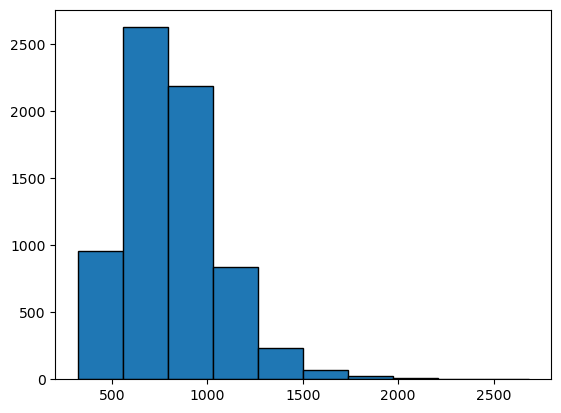

In [31]:
hist = dataset['PT08.S3(NOx)'].hist(edgecolor='black', grid=False)

<Axes: xlabel='PT08.S3(NOx)'>

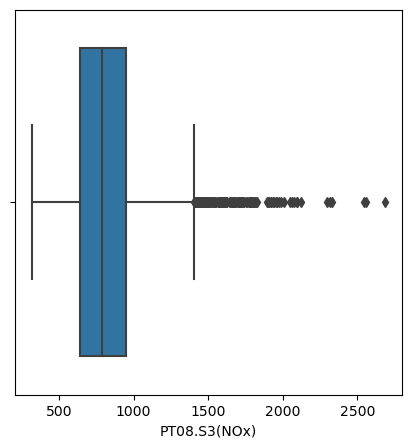

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(data=dataset['PT08.S3(NOx)'], x=dataset['PT08.S3(NOx)'])

<Axes: xlabel='PT08.S3(NOx)', ylabel='PT08.S3(NOx)'>

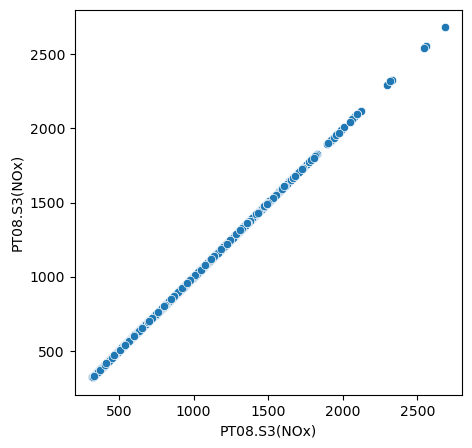

In [33]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=dataset['PT08.S3(NOx)'], x=dataset['PT08.S3(NOx)'], y=dataset['PT08.S3(NOx)'])

# Train and Test Split

In [34]:
from sklearn.model_selection import train_test_split

print(X.shape)
print(y.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(ytrain[:10])
print(ytest[:10])

#print(Xtrain[:10])
#print(Xtest[:10])

(6941, 16)
(6941,)
1278     903.0
2109    1299.0
5799    1263.0
8493    1053.0
6530     649.0
6366    1198.0
6334     760.0
7890     577.0
6278     727.0
7355     908.0
Name: PT08.S3(NOx), dtype: float64
6238     659.0
9133     651.0
9193     554.0
9000     660.0
8976     614.0
9006     697.0
112      622.0
2911     776.0
6487    1034.0
5098     780.0
Name: PT08.S3(NOx), dtype: float64


# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print(ytest[:10])
print(ytest.shape)
print(ypred[:10])
print(ypred.shape)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('R2 metric:', r2_score(ytest, ypred))


6238     659.0
9133     651.0
9193     554.0
9000     660.0
8976     614.0
9006     697.0
112      622.0
2911     776.0
6487    1034.0
5098     780.0
Name: PT08.S3(NOx), dtype: float64
(1389,)
[ 710.08560062  661.82098557  495.15506886  746.09863111  685.50811998
  738.87552228  634.40531447  809.19081605 1099.7978957   873.68378199]
(1389,)
Root Mean Squared Error: 94.96904108559482
R2 metric: 0.8555240424518322


# Support Vector Machine

In [36]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=500).fit(X, y)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('R2 metric:', r2_score(ytest, ypred))


Root Mean Squared Error: 121.3410053030554
R2 metric: 0.7641441497038315


# K-Neighbours Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=10)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('R2 metric:', r2_score(ytest, ypred))


Root Mean Squared Error: 93.50526721206826
R2 metric: 0.8599433845892855


# Truth and Predictions side by side

In [38]:
ypred = model.predict(Xtest)
dataset_comparison = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
dataset_head = dataset_comparison.head(40)
print(dataset_head)

      Actual  Predicted
6238   659.0      602.0
9133   651.0      663.1
9193   554.0      597.6
9000   660.0      651.0
8976   614.0      659.3
9006   697.0      751.6
112    622.0      581.4
2911   776.0      859.0
6487  1034.0      998.6
5098   780.0     1011.4
4776   931.0      947.6
9231   489.0      549.7
3075   690.0      703.9
2520   616.0      640.2
1564   803.0      735.1
3476   798.0      837.6
5683   440.0      418.3
3766  1032.0     1112.4
4012   704.0      852.3
5828   820.0      857.8
7996  1033.0     1022.2
8343   566.0      584.0
2517   724.0      739.8
2765   742.0      752.8
556    841.0      865.8
2545   695.0      703.1
8307   600.0      601.4
6223   547.0      560.8
3819   807.0      863.2
7820  1133.0     1109.5
8314   775.0      828.0
7943   719.0      725.2
2246   850.0      807.3
6066   518.0      500.0
4036   804.0      959.8
9173   658.0      671.9
6543   923.0      952.5
2623   952.0      919.8
2756   992.0     1028.3
7696   856.0      861.4


# Chart Regression

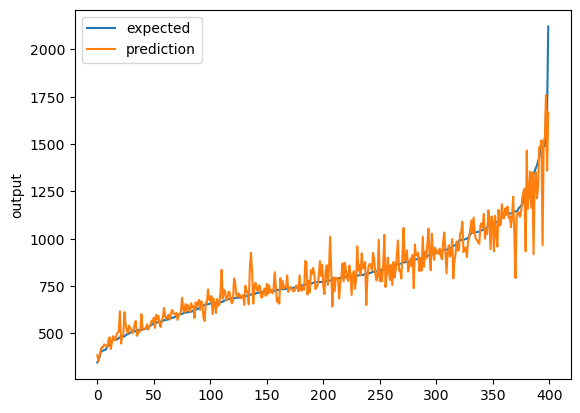

In [39]:
# From previous labs
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
chart_regression(ypred[:400].flatten(),ytest[:400].to_numpy(),sort=True) 

# Grid Regression

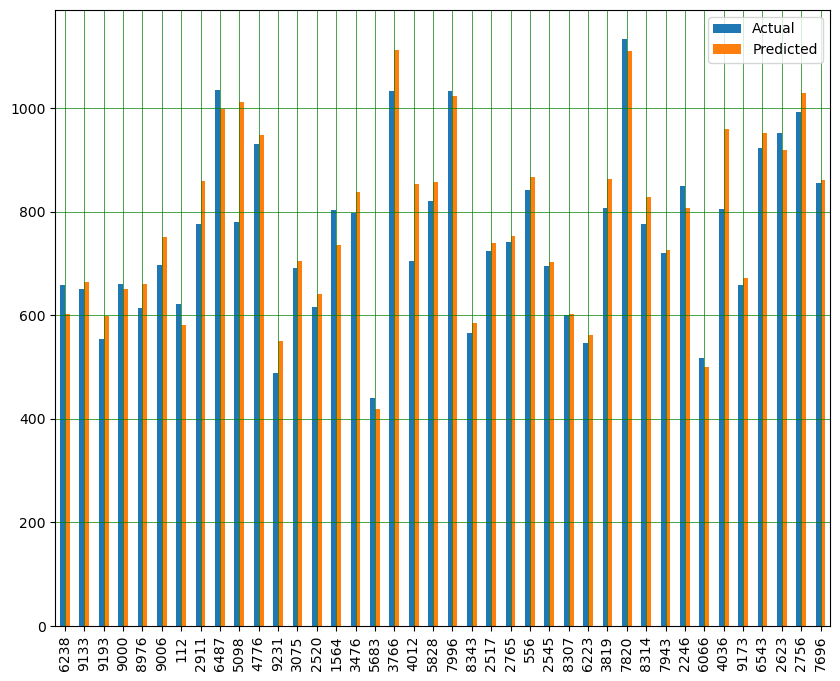

Mean: 812.9251259899208
Root Mean Squared Error: 93.50526721206826


In [40]:
# From previous labs
dataset_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean:', np.mean(ytest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

# TODO:
- How to encode categorical data
- Feature scaling/normalization
- Deal with outliers
- Reducing dimensions through correlation producing worse results
- Other regression models (1 "simple" model and neural network with and without lstm)